In [1]:
!pip install seaborn
!pip install scikit-learn

     |████████████████████████████████| 292 kB 15.0 MB/s            
     |████████████████████████████████| 22.2 MB 89 kB/s             3 MB/s eta 0:00:02
     |████████████████████████████████| 309 kB 64.2 MB/s            


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
df = pd.read_csv('winequalityN.csv').dropna()

In [25]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
def print_summarize_dataset(data_frame):
    print(f"Dataset dimension: {data_frame.shape}\n")
    print(f"First 10 rows of dataset:\n{data_frame.head(10)}\n")
    print(f"Statistical summary:\n{data_frame.describe()}")


print_summarize_dataset(df)

Dataset dimension: (6463, 13)

First 10 rows of dataset:
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   
6  white            6.2              0.32         0.16             7.0   
7  white            7.0              0.27         0.36            20.7   
8  white            6.3              0.30         0.34             1.6   
9  white            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.

In [27]:
def get_test(data_frame):
  print(data_frame.corr(method = 'pearson')['alcohol'])

get_test(df)

fixed acidity          -0.096190
volatile acidity       -0.039528
citric acid            -0.010056
residual sugar         -0.359132
chlorides              -0.257664
free sulfur dioxide    -0.179477
total sulfur dioxide   -0.264385
density                -0.687432
pH                      0.120473
sulphates              -0.004116
alcohol                 1.000000
quality                 0.444637
Name: alcohol, dtype: float64


From this corrolation we can see that corrolation between alcohol and density is the highest. Let's see plot of them.

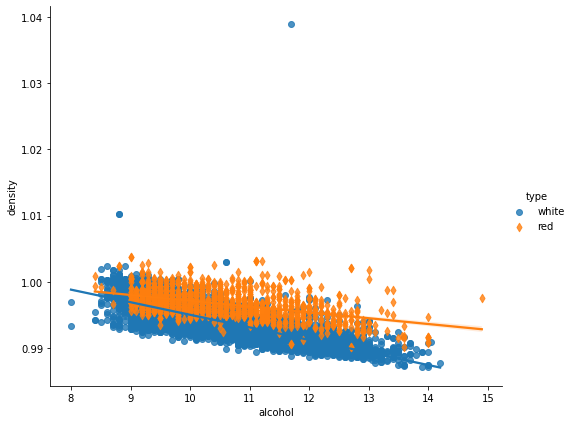

In [28]:
def get_plot(data_frame):
  sns.lmplot(x ='alcohol', y ='density', data = data_frame, hue ='type', markers=["o", "d"],
              height=6, aspect = 1.2)

get_plot(df)

Let's see some other corrolations also

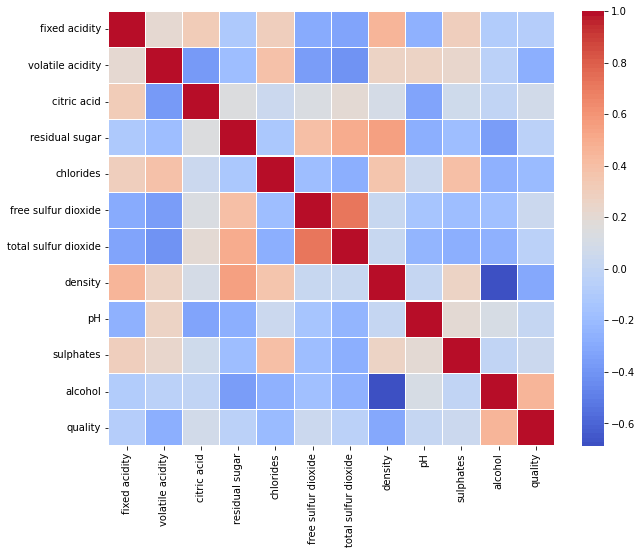

In [29]:
def get_correlation(data_frame):
  color = sns.color_palette('coolwarm', 100)
  plt.figure(figsize = (10, 8))
  sns.heatmap(data_frame.corr(), cmap = color, linewidth=0.15)

get_correlation(df)

With help of this plot we can see other corollations between features of our dataset. Again with help of one of the best libraries of python we can see corrolations below.

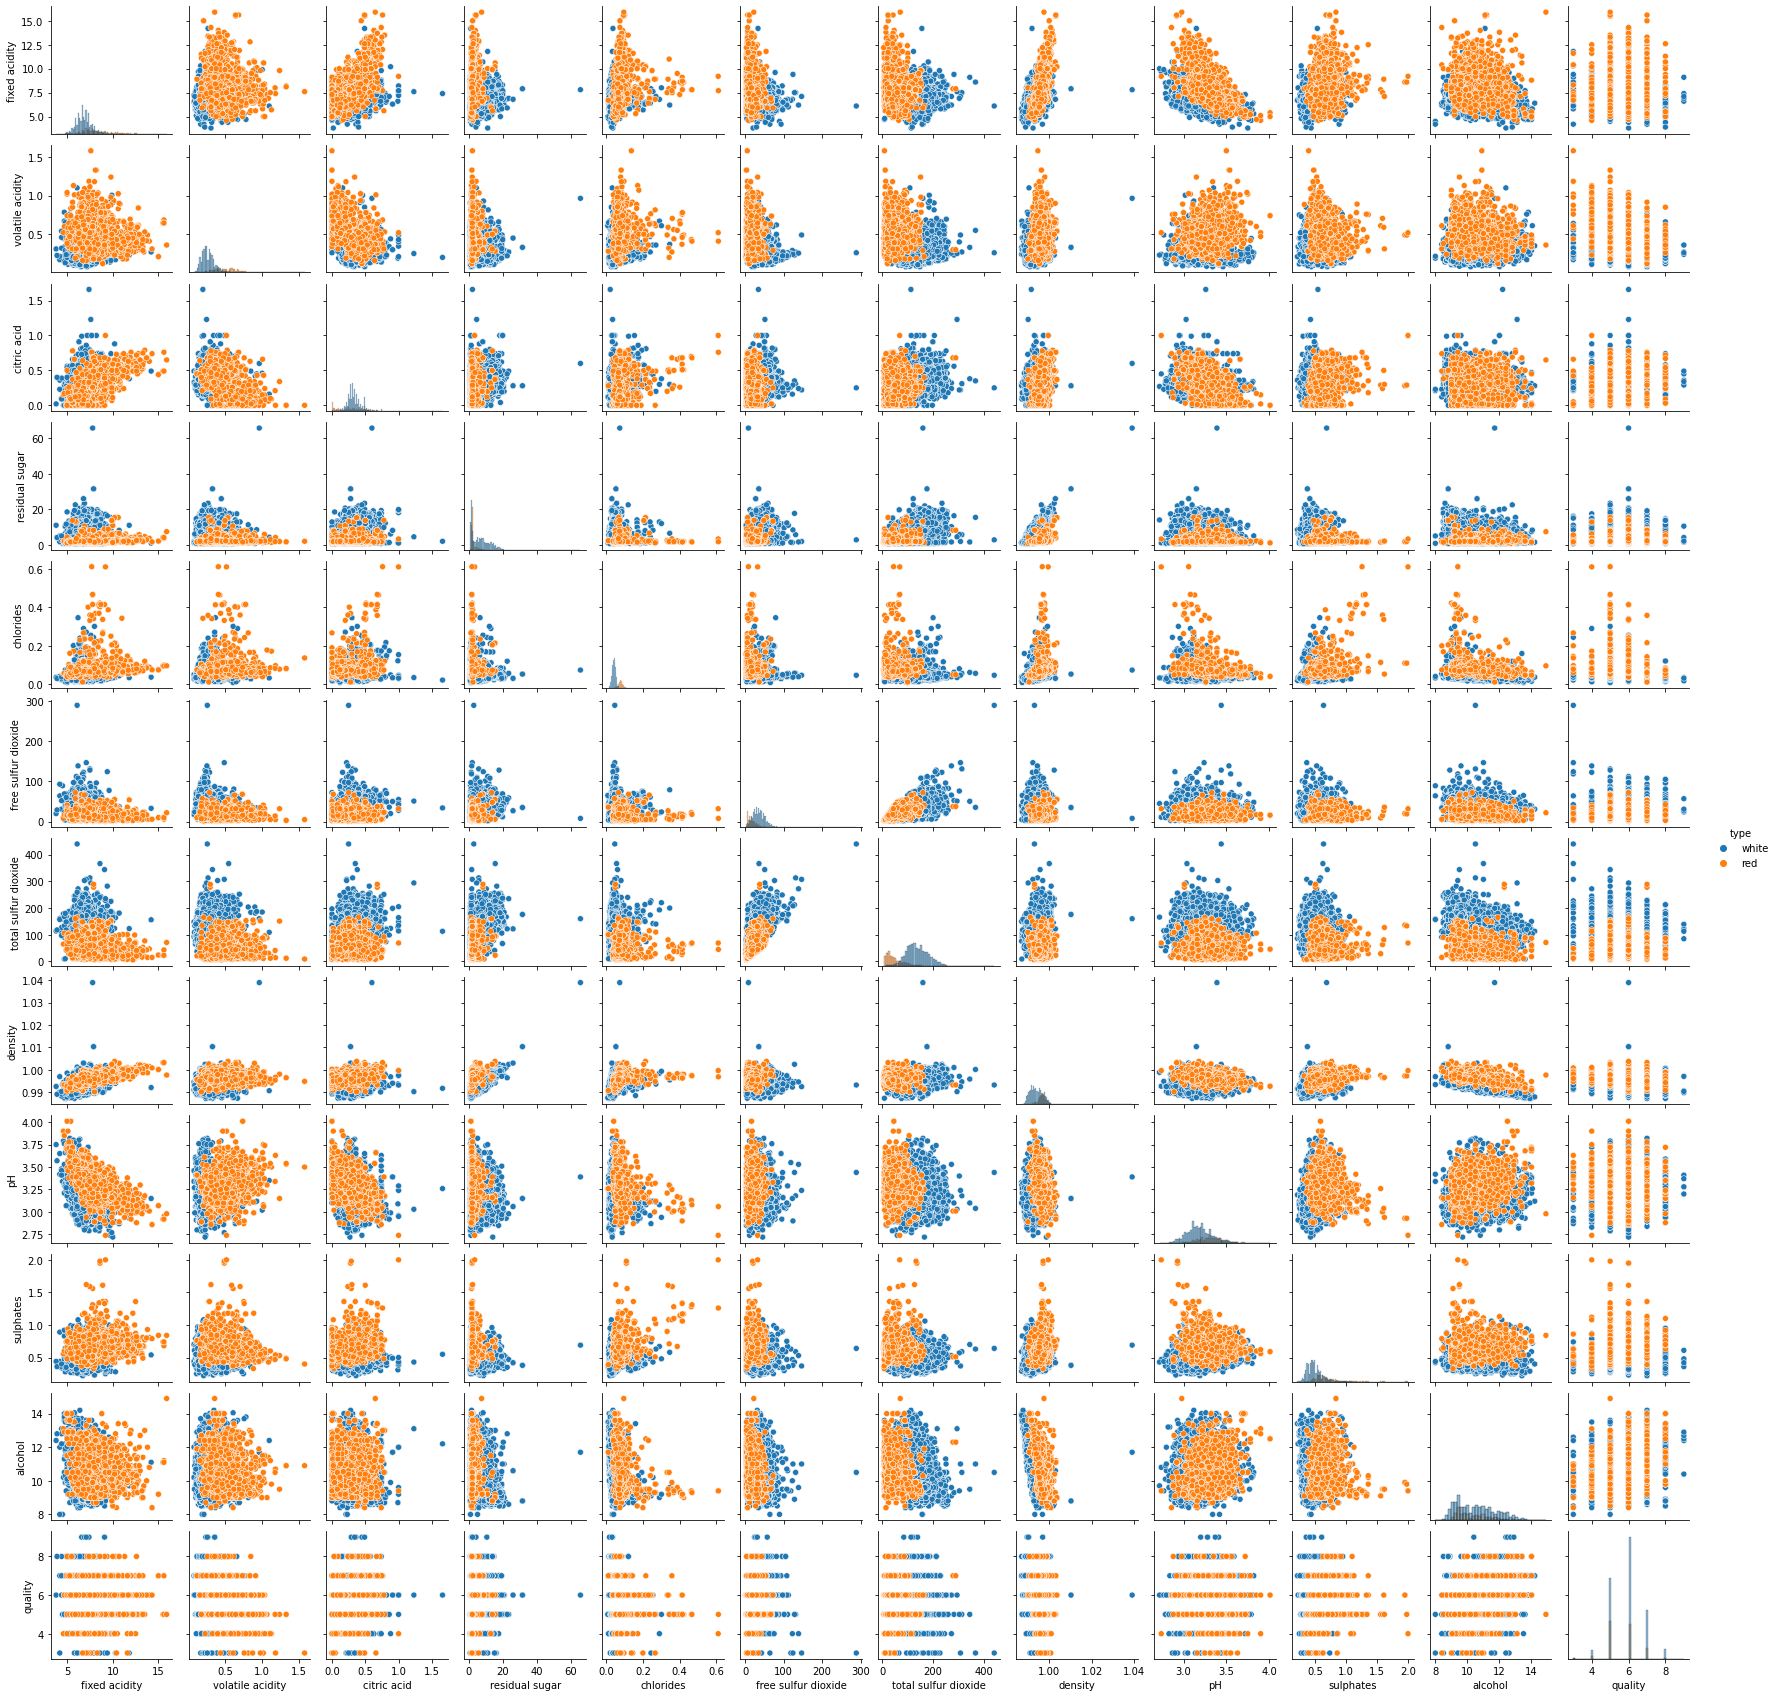

In [7]:
def get_pair_plot(data_frame):
    sns.pairplot(data_frame, hue='type', diag_kind="hist", height = 2)   
    plt.show()

get_pair_plot(df)

From these plots we can see some correlations: fixed acidity and pH, a little one between residual sugar and density, between free sulfur dioxide and total sulfur dioxide is higher then in others. And now let's deduce these plots.

In [11]:
def draw_jointplot(data_frame, param_1, param_2, p_color = 'blue'):
  sns.jointplot(x = data_frame[param_1], y = data_frame[param_2], kind = 'hex', color = p_color)

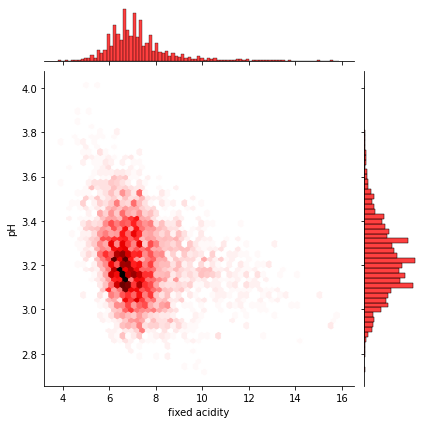

In [12]:
draw_jointplot(df, 'fixed acidity', 'pH', 'red')

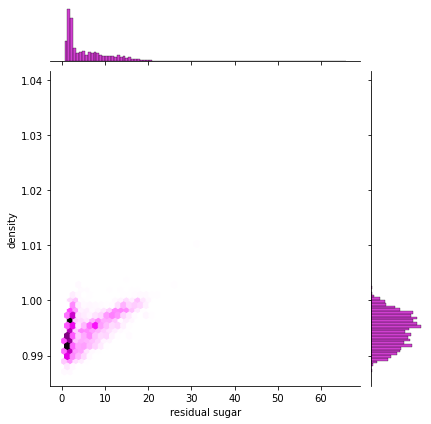

In [13]:
draw_jointplot(df, 'residual sugar', 'density', 'm')

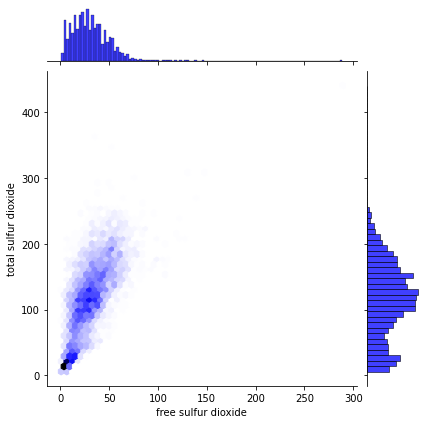

In [14]:
draw_jointplot(df, 'free sulfur dioxide', 'total sulfur dioxide')

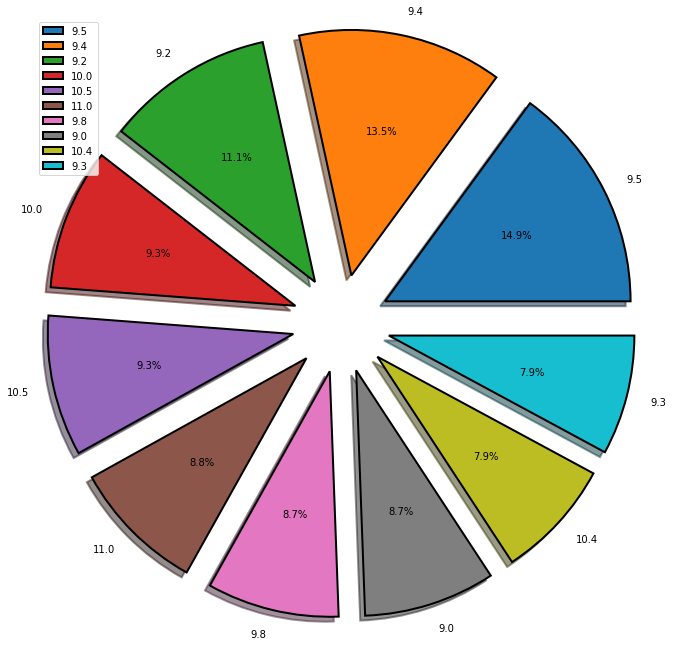

In [9]:
Alcohol = df.groupby(by=df['alcohol'])
def get_top_alhcohols(param):
    c = param.count()['quality'].sort_values(ascending=False).head(10)
    plt.figure(figsize=(11, 13))
    explode=len(c.values)*[0.2]
    textprops = dict(color ="black", fontsize=10)
    wp = { 'linewidth' : 2, 'edgecolor' : "black" }
    plt.pie(c, labels=c.index, explode=explode,autopct='%1.1f%%', wedgeprops =wp, textprops=textprops, shadow=True)
    plt.legend(prop = {'size' : 10}, loc = 'upper left')
    plt.show()
get_top_alhcohols(Alcohol)

In [30]:
def sorting_for_test(df):
    del df['type']
    reviews = []
    for i in df['quality']:
      reviews.append('1' if i==3 else '2' if i>3 and i<6 else '3' if i>7 and i<9 else '4')
      
    df['reviews'] = reviews
    return df['reviews'].value_counts()

test_df = sorting_for_test(df)

In [31]:
def machine_learning(df):
    X = df.drop(['quality', 'reviews'], axis = 1)
    y = df['reviews']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    

    model_1 = DecisionTreeClassifier()
    model_1.fit(X_train, y_train)
    model_1_acc = accuracy_score(y_test, model_1.predict(X_test))
    print('%s: %f' % ("DecisionTree", model_1_acc.mean()), '\n')

    model_2 = KNeighborsClassifier()
    model_2.fit(X_train, y_train)
    model_2_acc = accuracy_score(y_test, model_2.predict(X_test))
    print('%s: %f' % ("KNeighbors", model_2_acc.mean()), '\n')

    model_3 = RandomForestClassifier()
    model_3.fit(X_train, y_train)
    model_3_acc = accuracy_score(y_test, model_3.predict(X_test))
    print('%s: %f' % ("RandomForest", model_3_acc.mean()), '\n')
    
    model_4 = GradientBoostingClassifier()
    model_4.fit(X_train, y_train)
    model_4_acc = accuracy_score(y_test, model_4.predict(X_test))
    print('%s: %f' % ("GradientBoosting", model_4_acc.mean()), '\n')

    model_5 = SVC()
    model_5.fit(X_train, y_train)
    model_5_acc = accuracy_score(y_test, model_5.predict(X_test))
    print('%s: %f' % ("SVC", model_5_acc.mean()), '\n\nRESULT')
    models = pd.DataFrame({'Model' : ['DecisionTree', 'KNeighbors', 'RandomForest',  'GradientBoosting', 'SVC'],
                           'Score' : [model_1_acc, model_2_acc, model_3_acc, model_4_acc, model_5_acc]})
    return models

In [32]:
machine_learning(df)

DecisionTree: 0.748647 

KNeighbors: 0.739366 

RandomForest: 0.816705 

GradientBoosting: 0.752514 

SVC: 0.761794 

RESULT


,Model,Score
0,DecisionTree,0.748647
1,KNeighbors,0.739366
2,RandomForest,0.816705
3,GradientBoosting,0.752514
4,SVC,0.761794
